In [1]:
!pip install tslearn

     |████████████████████████████████| 798kB 6.9MB/s 


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
plt.style.use('seaborn')
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_DIR = '/content/drive/My Drive/4th Year/CS 197 (Thesis)/FINAL - COVID Modeling/notebooks/data/'
file_path = os.path.join(BASE_DIR, 'combined_added_shifts.csv')
df = pd.read_csv(file_path, index_col=0)

In [5]:
df.head()

Province/State Country/Region       Lat  ...  shift 34  shift 35 shift 36
0    no province    Afghanistan  33.93911  ...        -1        -1       -1
1    no province        Albania  41.15330  ...        -1        -1       -1
2    no province        Algeria  28.03390  ...        -1        -1       -1
3    no province      Argentina -38.41610  ...        -1        -1       -1
4    no province        Armenia  40.06910  ...        -1        -1       -1

[5 rows x 949 columns]

# K-Means using tslearn

Source: https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3

## Combined

In [6]:
data = df.iloc[:, -36:]
data.head()

shift 1  shift 2  shift 3  shift 4  ...  shift 33  shift 34  shift 35  shift 36
0        0        0        0        0  ...        -1        -1        -1        -1
1        0        0        0        0  ...        -1        -1        -1        -1
2        0        0        0        0  ...        -1        -1        -1        -1
3        0        0        0        0  ...        -1        -1        -1        -1
4        0        0        0        0  ...         8        -1        -1        -1

[5 rows x 36 columns]

In [7]:
from tslearn.clustering import TimeSeriesKMeans

class TimeSeriesModel:
  n_clusters = 0
  data = []
  model = None

  def __init__(self, n_clusters, data):
    self.n_clusters = n_clusters
    self.data = data
  
  def build_model(self, metric='dtw', max_iter=10):
    model = TimeSeriesKMeans(n_clusters=self.n_clusters, metric=metric, max_iter=max_iter)
    model.fit(self.data)
    self.model = model

    return model

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [8]:
# Elbow method
def get_elbow(data):
  X = data
  distortions = []
  for k in range(2, 20):
    model_class = TimeSeriesModel(n_clusters=k, data=X)
    model = model_class.build_model()
    distortions.append(model.inertia_)

  fig = plt.figure(figsize=(15, 5))
  fig.add_axes()
  plt.plot(range(2, 20), distortions)
  plt.grid(True)
  plt.title('Elbow curve')

get_elbow(data)

KeyboardInterrupt: ignored

In [9]:
# Number of clusters is based on the elbow method
NUM_CLUSTERS = 5

model_class = TimeSeriesModel(n_clusters=NUM_CLUSTERS, data=data)
model = model_class.build_model()

In [10]:
df['labels'] = model.labels_
df.head()

Province/State Country/Region       Lat  ...  shift 35  shift 36 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      3
1    no province        Albania  41.15330  ...        -1        -1      0
2    no province        Algeria  28.03390  ...        -1        -1      1
3    no province      Argentina -38.41610  ...        -1        -1      2
4    no province        Armenia  40.06910  ...        -1        -1      2

[5 rows x 950 columns]

In [11]:
cluster1 = df[df['labels']==1]
countries = set(cluster1['Country/Region'])
ss = ','.join(countries)
ss

"Korea, South,Egypt,Ghana,Australia,Bangladesh,Saudi Arabia,Madagascar,Algeria,Singapore,Lesotho,Zambia,Congo (Brazzaville),Cote d'Ivoire,Pakistan,Equatorial Guinea,Mongolia,Cameroon,Japan,Ethiopia,Zimbabwe,Rwanda,Kenya,Mozambique"

In [12]:
df.to_csv(os.path.join(BASE_DIR, 'new_clustered_countries_kmeans.csv'))

## Graphing the Clusters

In [ ]:
# All countries
def get_graphs(df, cluster_num=0, last_columns=38):
  fig=plt.figure(figsize=(50,20))
  ax=fig.add_axes([0,0,1,1])
  ax.set_xlabel("Dates")
  ax.set_ylabel("Cases")

  df_cluster = df[df['labels'] == cluster_num]
  for idx, area in df_cluster.iterrows():
    x = area.index[6:-last_columns]
    y = [area[i] for i in x]
    
    ax.plot(x,y,label=area['Country/Region'])
    #comment out the line below to remove the labels of the area names.
    ax.legend()

In [ ]:
for cols in df.columns[6:-77]:
    df[cols][df[cols]<0]=0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying

In [ ]:
for cols in df.columns[6:-38]:
    if cols[-1]=='x':
        df=df.rename(columns={cols:cols[:-1]+'confirmed'})
    elif cols[-1]=='y':
        df=df.rename(columns={cols:cols[:-1]+'deaths'})
    #else:
        #df=df.rename(columns={cols:cols+"_recovered"})
df.columns[6:-38]

Index(['1/22/20_confirmed', '1/23/20_confirmed', '1/24/20_confirmed',
       '1/25/20_confirmed', '1/26/20_confirmed', '1/27/20_confirmed',
       '1/28/20_confirmed', '1/29/20_confirmed', '1/30/20_confirmed',
       '1/31/20_confirmed',
       ...
       '4/9/21_deaths', '4/10/21_deaths', '4/11/21_deaths', '4/12/21_deaths',
       '4/13/21_deaths', '4/14/21_deaths', '4/15/21_deaths', '4/16/21_deaths',
       '4/17/21_deaths', '4/18/21_deaths'],
      dtype='object', length=906)

In [ ]:
df[df.columns[794]].head()

0    0.012804
1    0.194031
2    0.011209
3    0.136469
4    0.307566
Name: 12/22/20_deaths, dtype: float64

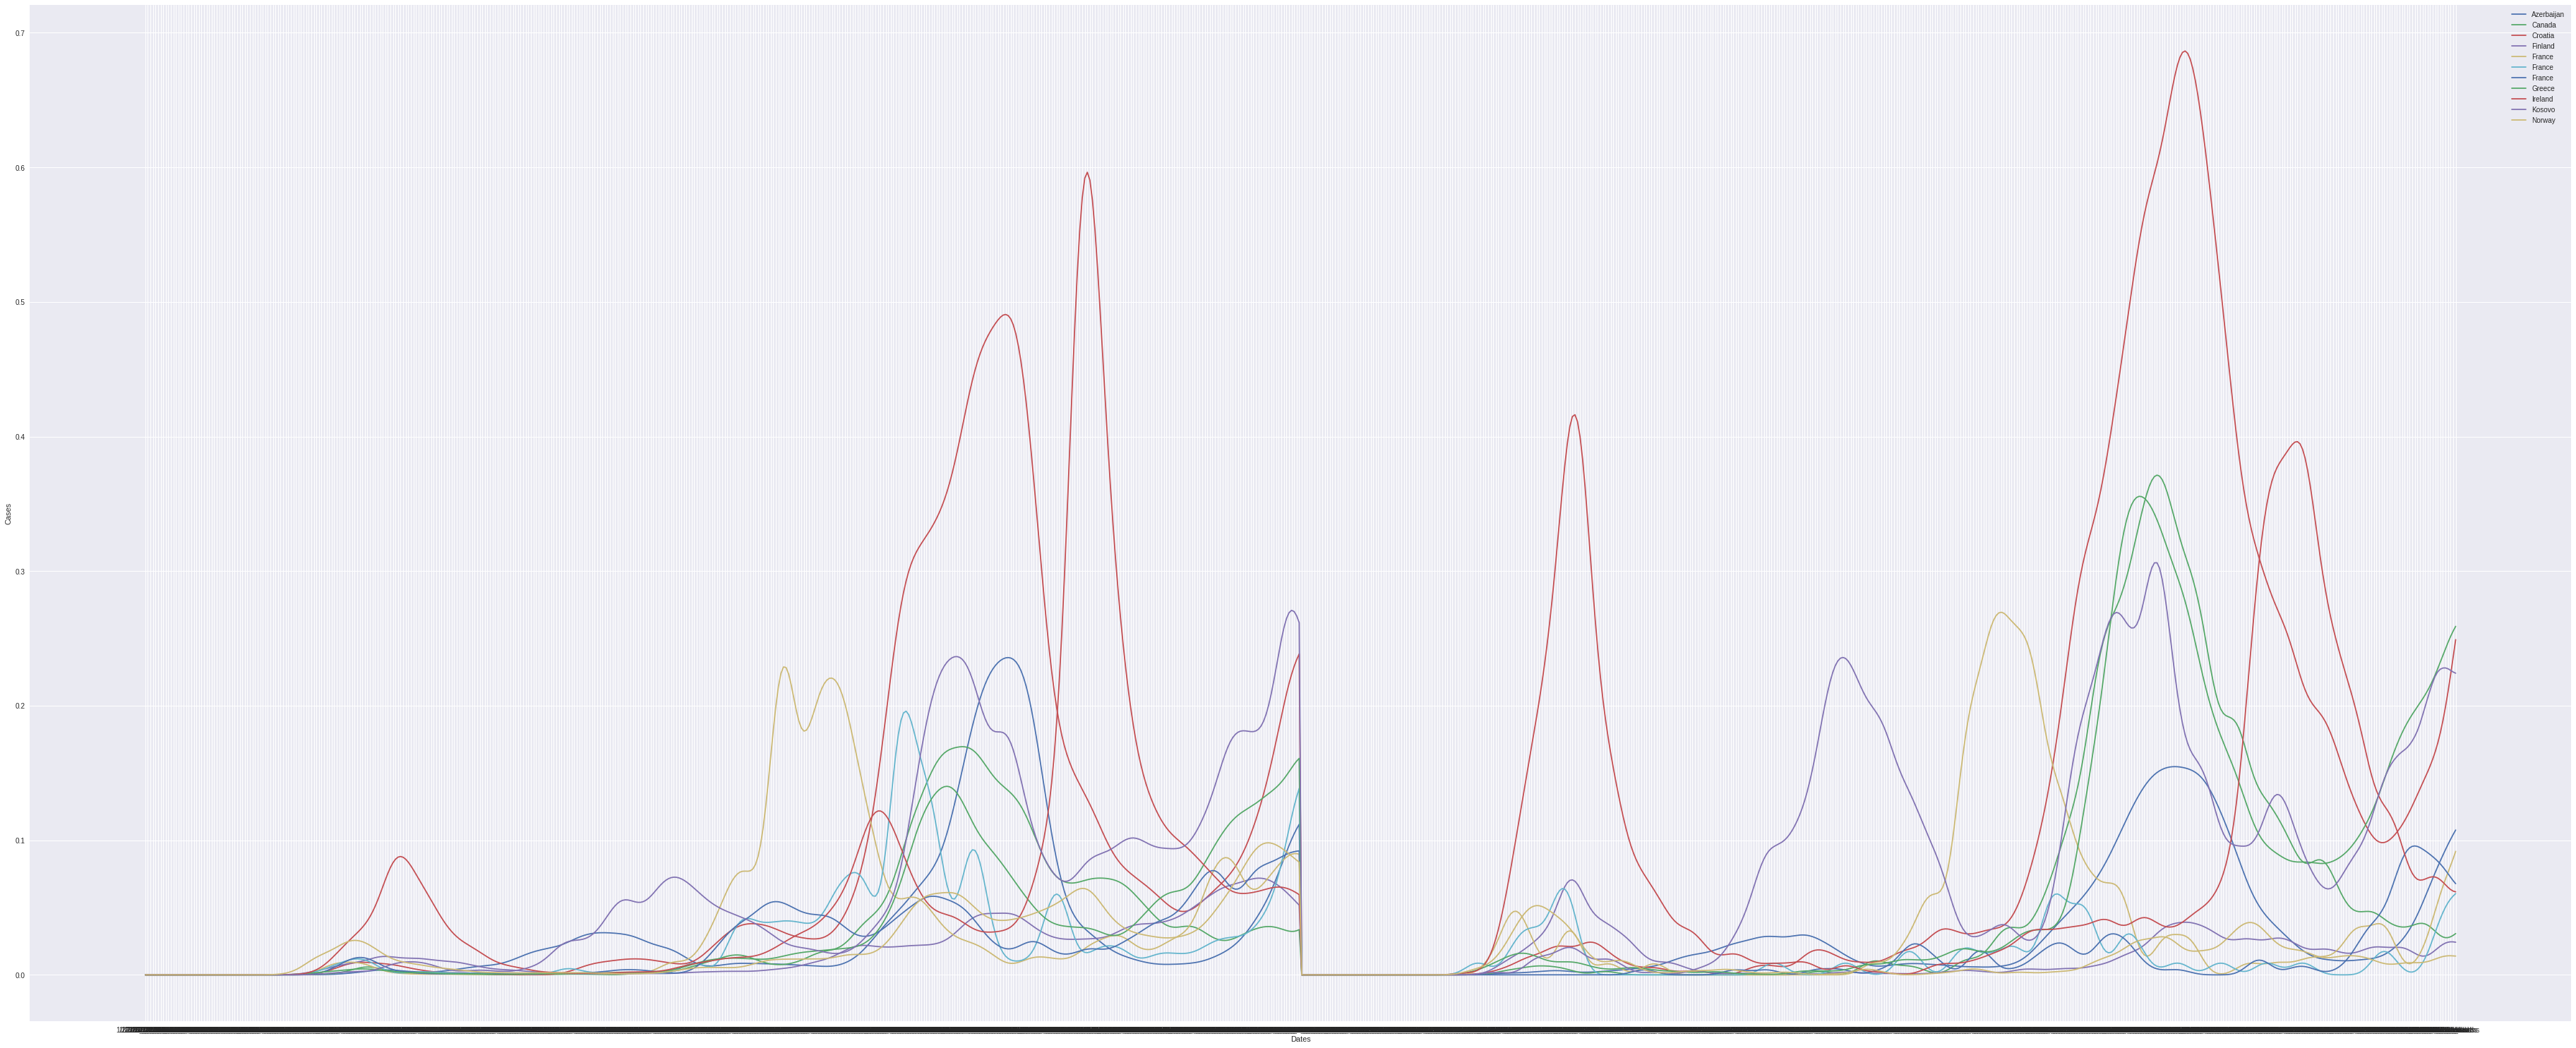

In [ ]:
get_graphs(df, cluster_num=0)

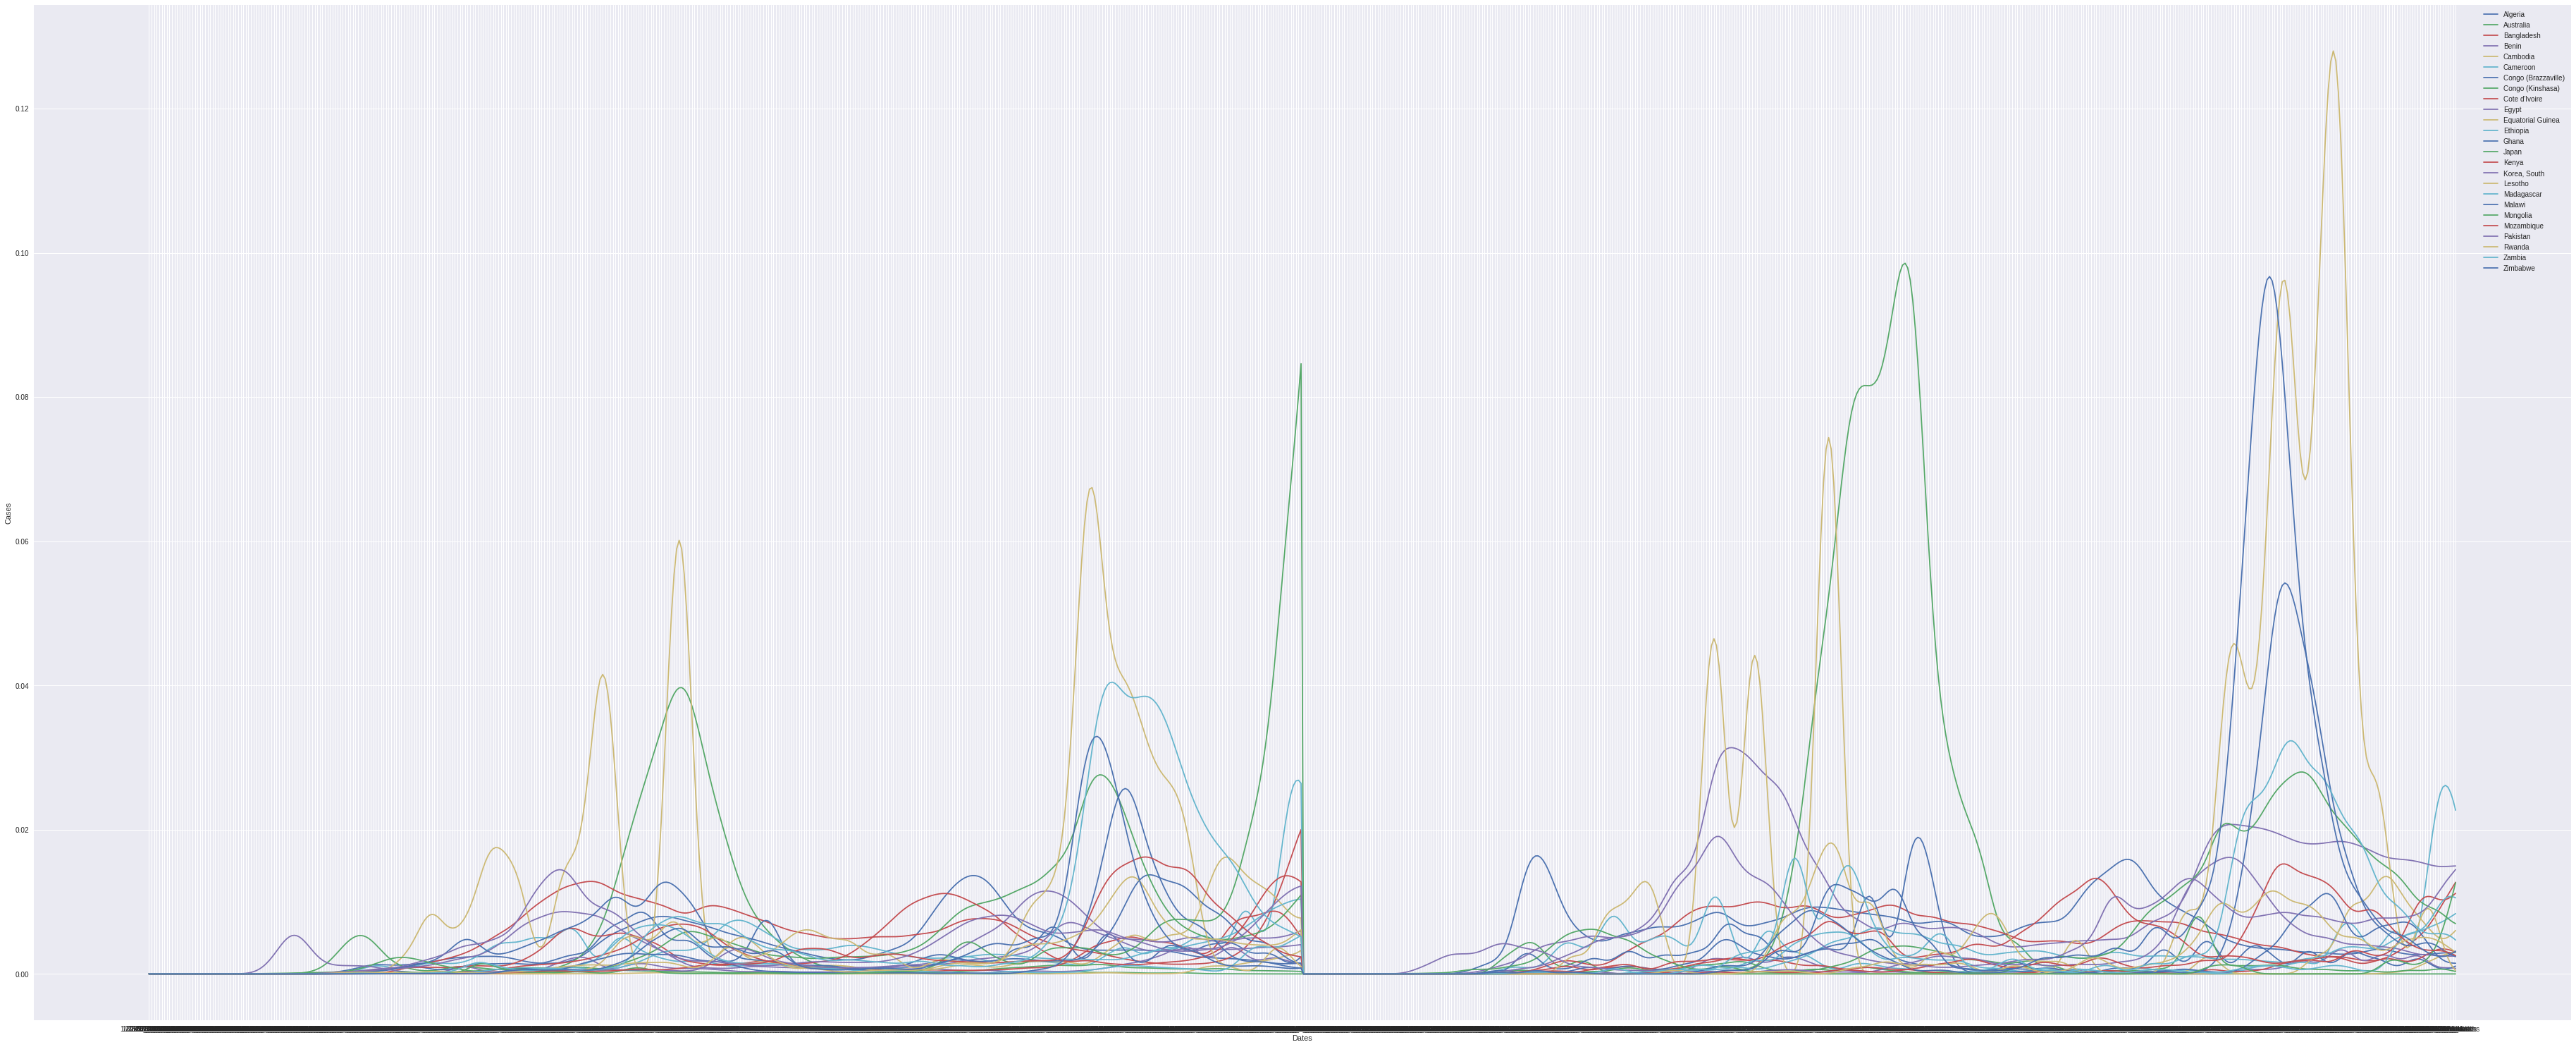

In [ ]:
get_graphs(df, cluster_num=1)

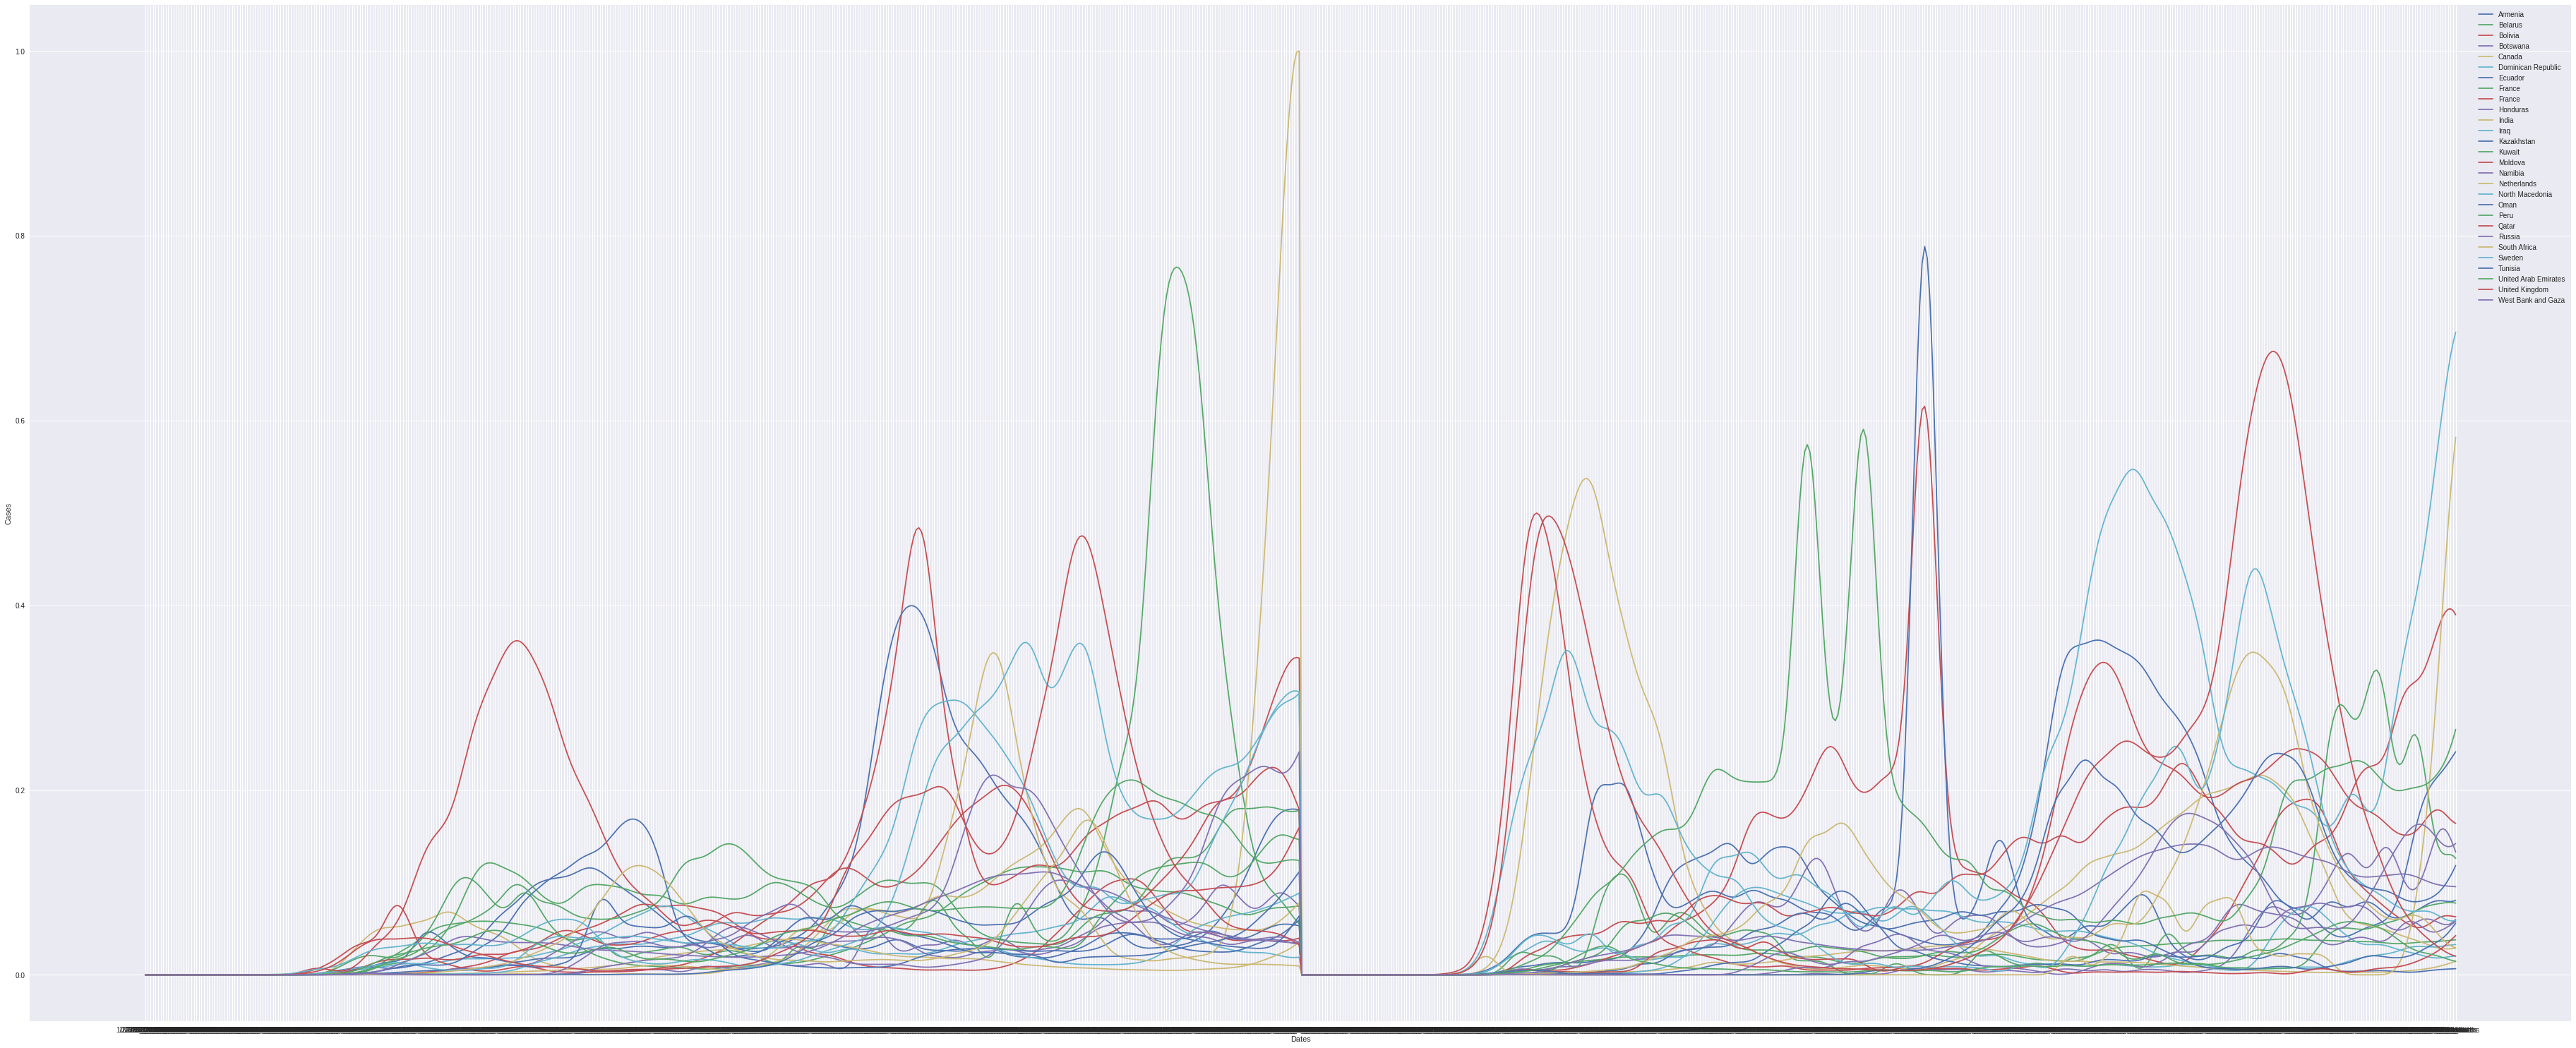

In [ ]:
get_graphs(df, cluster_num=2)

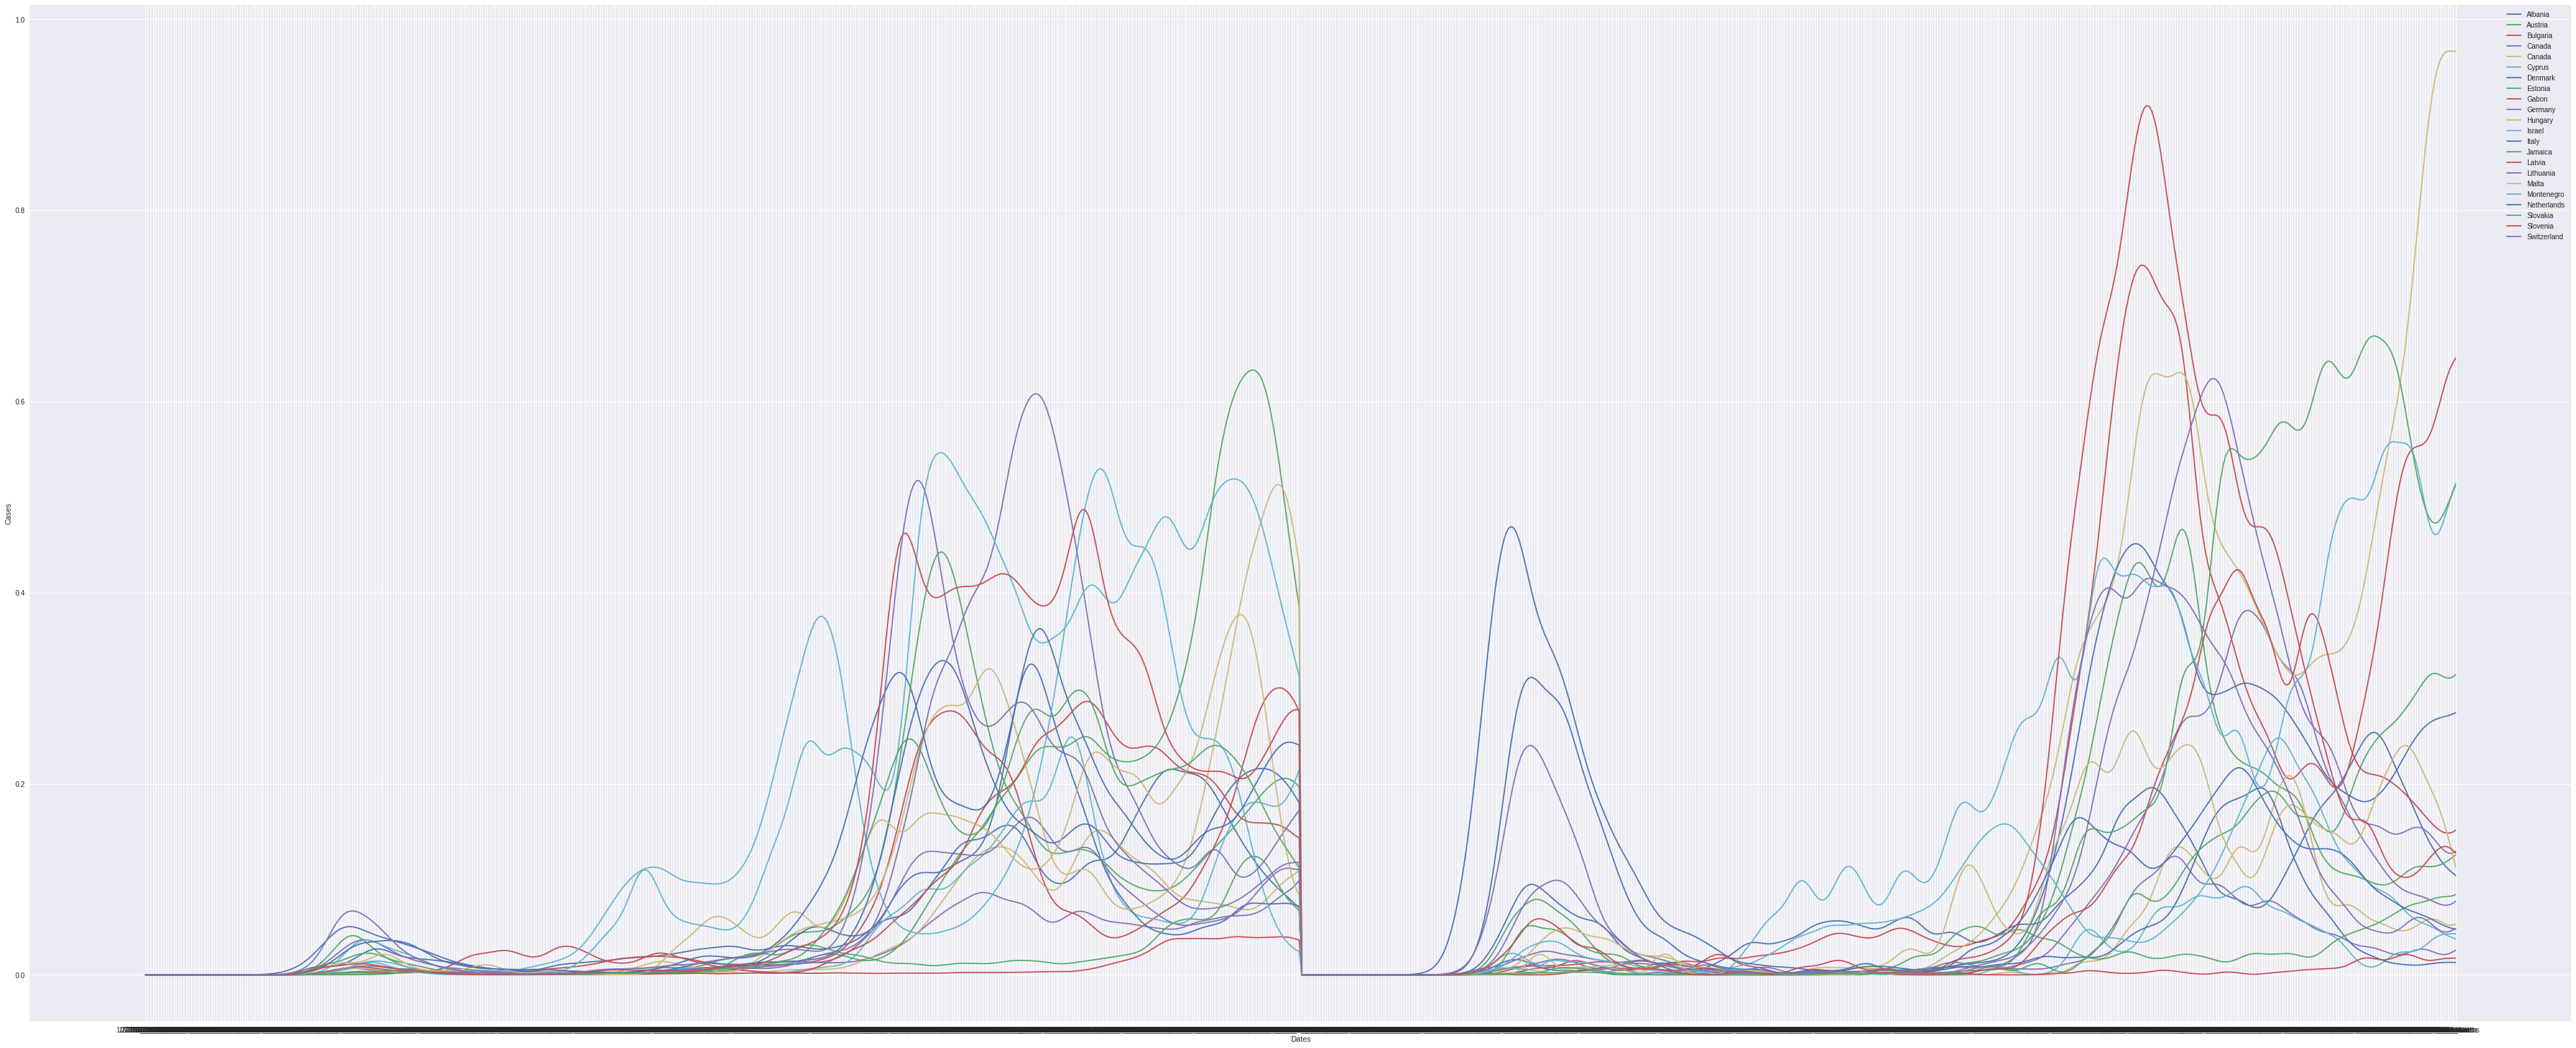

In [ ]:
get_graphs(df, cluster_num=3)

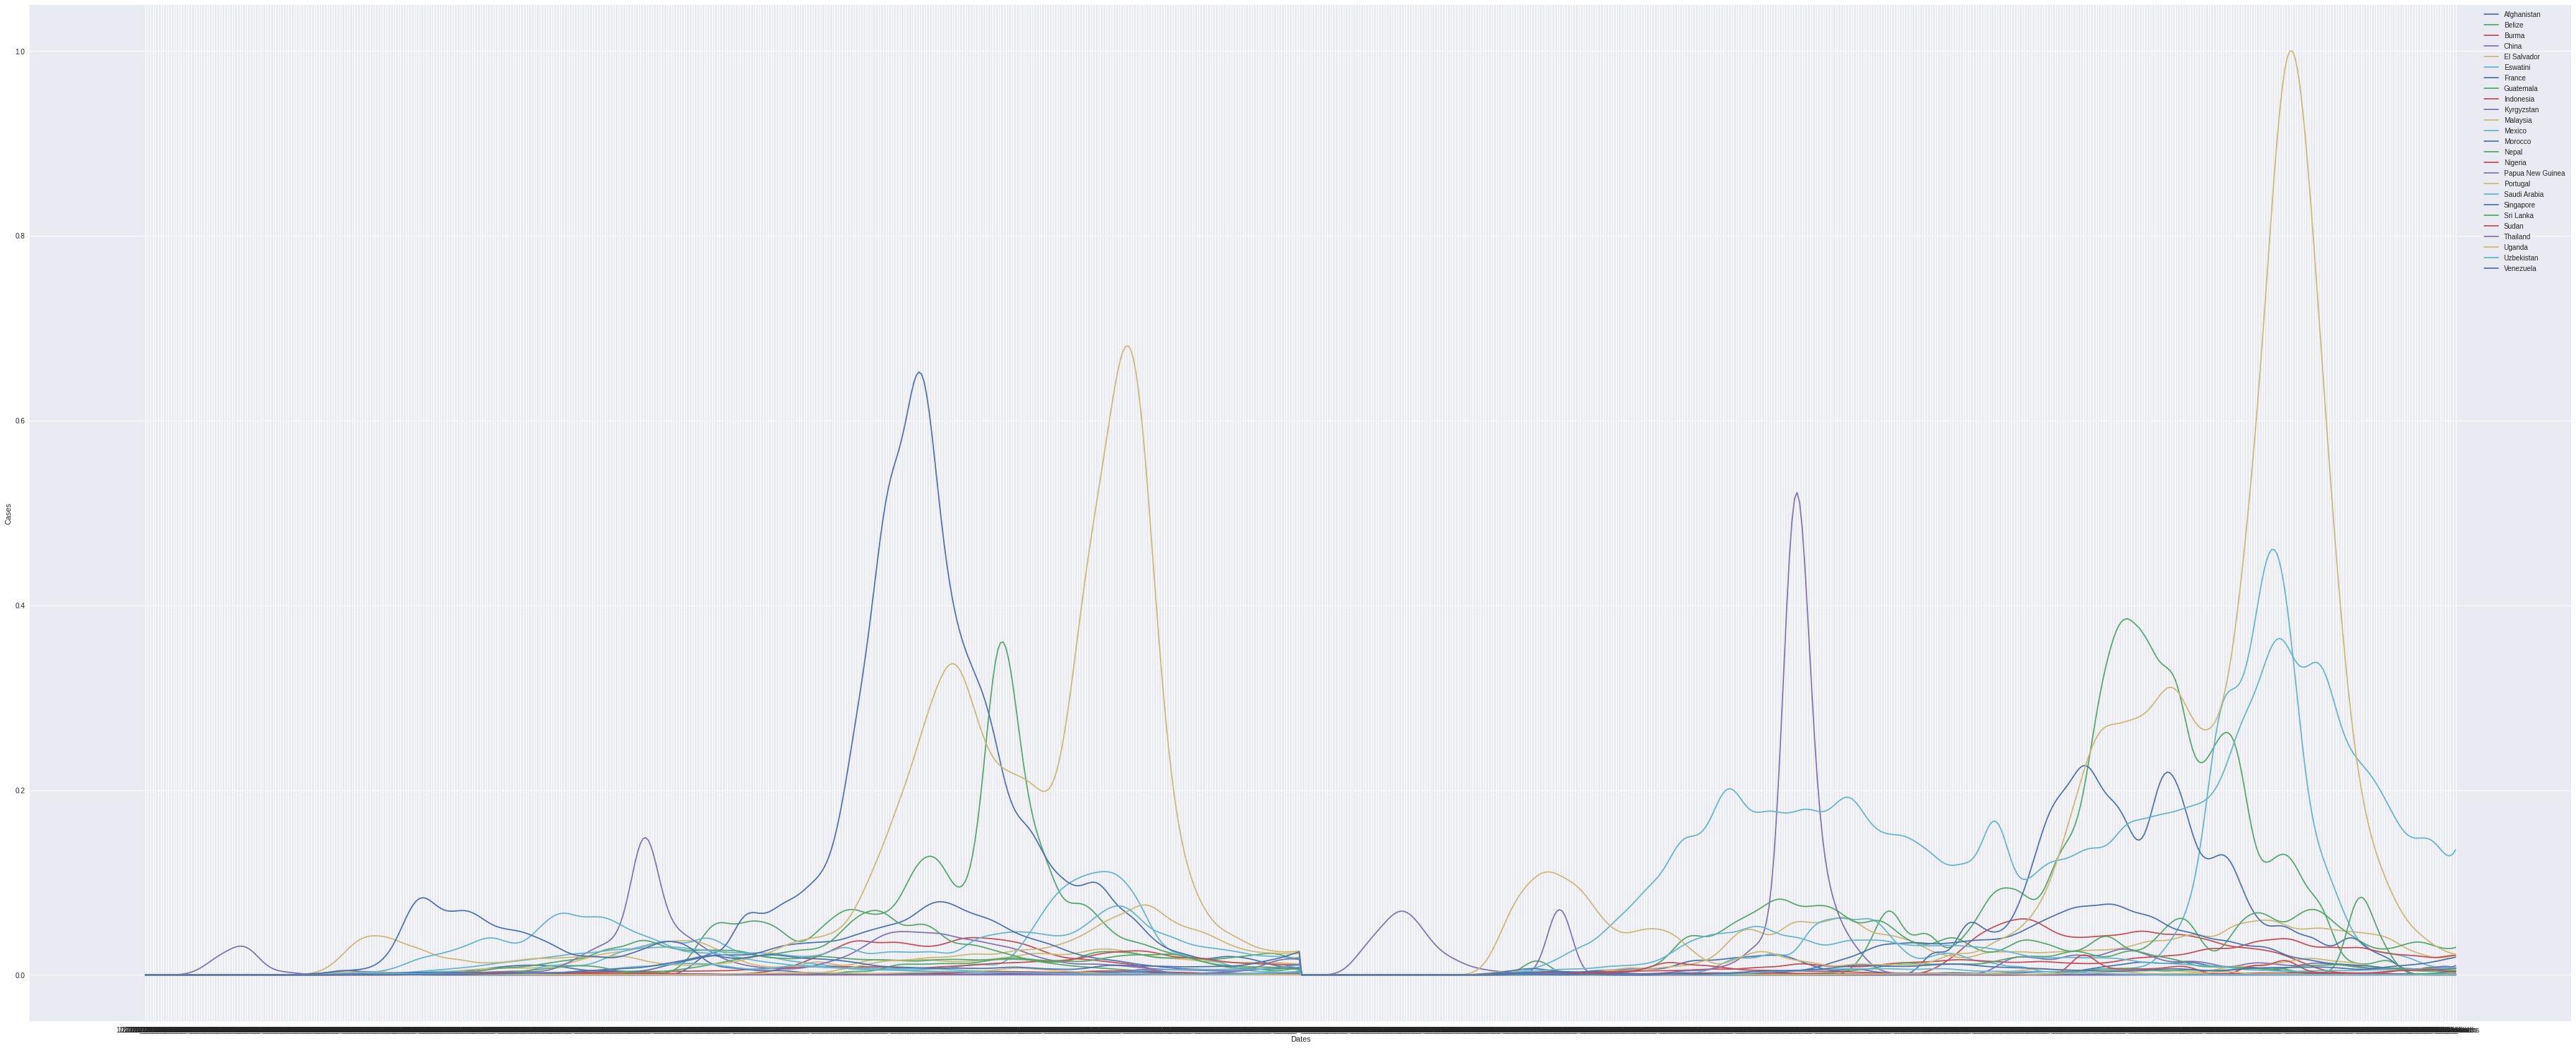

In [ ]:
get_graphs(df, cluster_num=4)

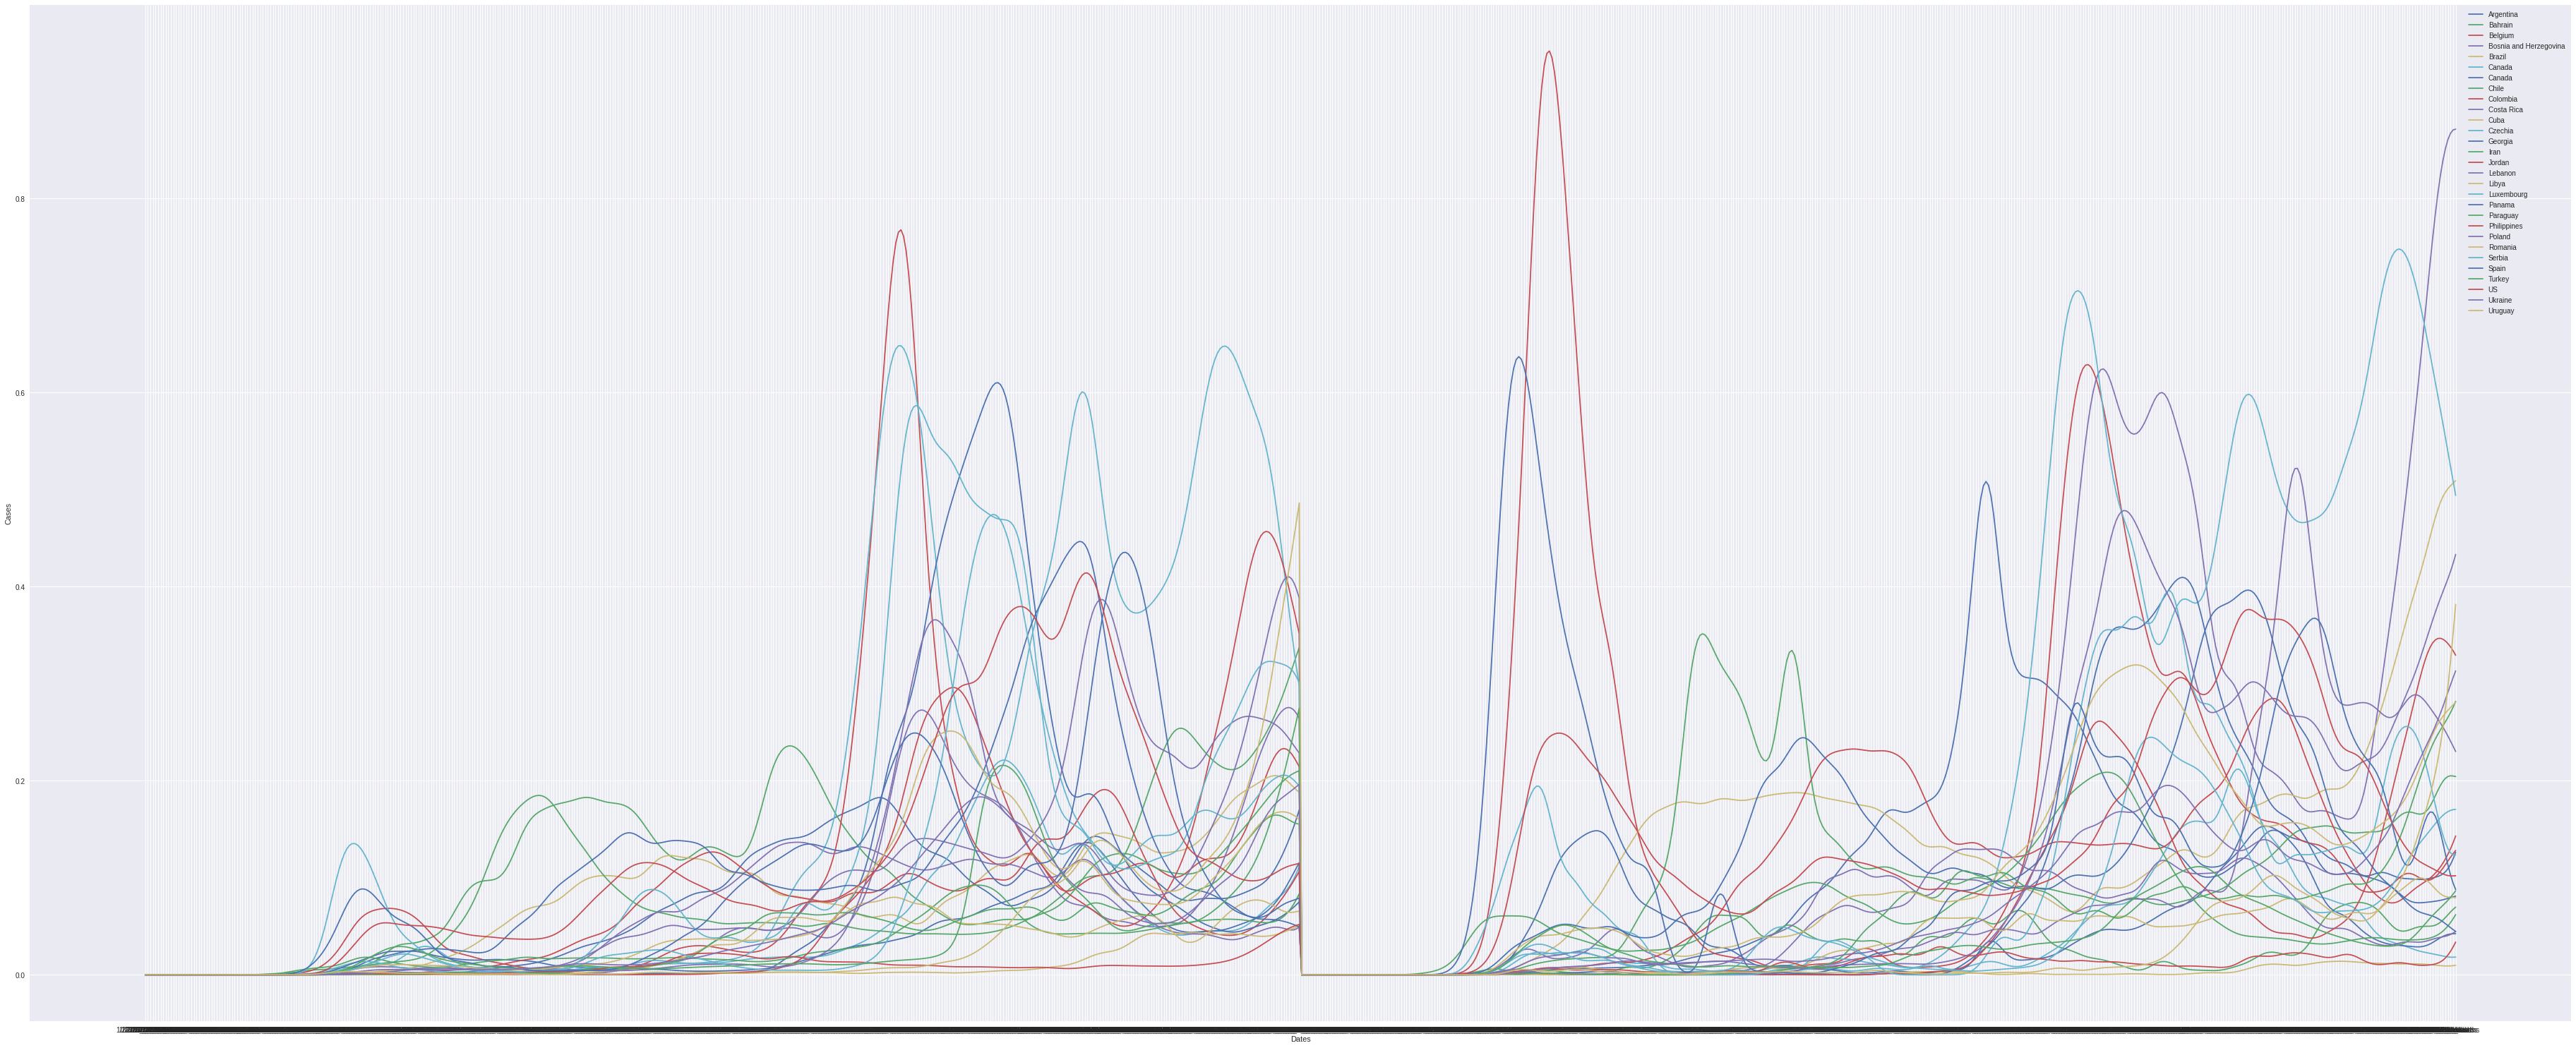

In [ ]:
get_graphs(df, cluster_num=5)

In [ ]:
df.shape

(140, 950)